Linear Programming (LP), also known as linear optimization is a mathematical programming technique to obtain the best result or outcome, like maximum profit or least cost, in a mathematical model whose requirements are represented by linear relationships. Linear programming is a special case of mathematical programming, also known as mathematical optimization.
Generally, an organization or a company has mainly two objectives, the first one is minimization and the other is maximization. Minimization means to minimize the total cost of production while maximization means to maximize their profit. So with the help of linear programming graphical method, we can find the optimum solution.In our case it is a maximization objective.

We are required to maximize the difference between the retail & offer prize

1) Decision Variables
The variables used to decide the output as decision variables. They are the unknowns of the mathematical programming model. In the given problem, we are to determine the value of offer price and retail price in order to maximize the profit. Also, there is a third binary varaible - which indicates whether or not we will have the offer. 


2) Objective Function
The main aim of the problem, either to maximize of to minimize, is the objective function of linear programming. In the problem given, Z (to maximize) is the objective function. 

3) Constraints
With respect to the given problem we will have 1 major type of constraint - We can spend less than or equal to 5M USD

In [1]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy import isnan
from sklearn.impute import KNNImputer

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics


#Libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#Other libraries
import random
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install pulp

     |████████████████████████████████| 14.2 MB 311 kB/s 


In [ ]:
from pulp import *

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Load the training & test sets

In [3]:
#change directory
%cd /content/drive/My Drive/Colab Notebooks/Enova

#Read csv and convert to pandas dataframe
train_DF = pd.read_csv('training.csv')

#Get the total number of Rows and Columns for each DF
print(train_DF.shape)

/content/drive/My Drive/Colab Notebooks/Enova
(8050, 19)


# Drop the missing values and data pre-processing

In [85]:
df = train_DF.copy()
df.columns
#rows
df.shape[0]

8050

In [86]:
df.isna().sum()

id                           0
Carats                       0
Cert                       552
Clarity                      0
Color                        0
Cut                          0
Depth                     1440
Known_Conflict_Diamond       0
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                     2531
Vendor                       0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
dtype: int64

we have 8k rows - deleting the rows with missing data
cleaner data is better than more data

https://www.brilliance.com/education/diamonds/depth-table

https://jewelhero.com/price-affect-on-diamonds-cut-quality/#:~:text=The%20factor%20that%20influences%20a,much%20as%20a%20diamond's%20cut.

We delete the Table & Depth columns due to high missing values and 4Cs are most imp predictors of Diamond Price

In [87]:
col_list = ['Table', 'Depth']
## Drop these columns - large number of missing values

df.drop(col_list,axis=1,inplace=True)

In [88]:
df.shape

(8050, 17)

In [89]:
df.isna().sum()

id                          0
Carats                      0
Cert                      552
Clarity                     0
Color                       0
Cut                         0
Known_Conflict_Diamond      0
Measurements                0
Polish                      0
Regions                     0
Shape                       0
Symmetry                    0
Vendor                      0
Price                       0
Retail                      0
LogPrice                    0
LogRetail                   0
dtype: int64

Drop the rows where Cert is missing or NaN

In [90]:
df = df.dropna(how='any',axis=0) 


In [91]:
df.isna().sum()

id                        0
Carats                    0
Cert                      0
Clarity                   0
Color                     0
Cut                       0
Known_Conflict_Diamond    0
Measurements              0
Polish                    0
Regions                   0
Shape                     0
Symmetry                  0
Vendor                    0
Price                     0
Retail                    0
LogPrice                  0
LogRetail                 0
dtype: int64

In [92]:

#lengthXwidthXdepth
# df1 = df.Measurements.str.split('x')
# df1
df[['length_mm', 'width_mm', 'depth_mm']] = df['Measurements'].str.split('x', expand=True)
df.drop("Measurements", axis=1, inplace=True)
df.columns

Index(['id', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut',
       'Known_Conflict_Diamond', 'Polish', 'Regions', 'Shape', 'Symmetry',
       'Vendor', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'length_mm',
       'width_mm', 'depth_mm'],
      dtype='object')

In [93]:
df.drop(['id'],axis=1,inplace=True)
df.shape

(7498, 18)

In [ ]:
# we want to delete all those records where the retail price is less than the price (offer)
# df['diff_profit'] = df['Retail'] - df['Price']
# i = df[(df.diff_profit < 0)].index
# df = df.drop(i)
# df.shape

In [94]:
df.dtypes

Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Known_Conflict_Diamond       bool
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                      int64
Price                       int64
Retail                      int64
LogPrice                  float64
LogRetail                 float64
length_mm                  object
width_mm                   object
depth_mm                   object
dtype: object

In [95]:
  #X = df['length_mm','width_mm','depth_mm']

df['length_mm']=df['length_mm'].astype(float)
df['width_mm']=df['width_mm'].astype(float)
df['depth_mm']=df['depth_mm'].astype(float)

# EXploratory Data Analysis

In [29]:
#Numerical Features with Price
Price_all = ['Carats','Vendor', 'Price', 'Retail', 'length_mm',
       'width_mm', 'depth_mm']
df_Price = df[Price_all]
type(df_Price)

pandas.core.frame.DataFrame

In [30]:
df_Price

,Carats,Vendor,Price,Retail,length_mm,width_mm,depth_mm
1,0.42,1,560,920,4.85,4.79,2.98
2,0.40,1,560,575,4.66,4.63,2.97
3,0.41,1,560,825,4.71,4.69,2.95
4,0.40,1,580,890,4.71,4.68,2.96
5,0.40,1,580,945,4.75,4.74,2.84
...,...,...,...,...,...,...,...
8044,1.90,3,11115,17090,8.07,7.96,4.88
8045,3.51,2,201685,299320,9.75,9.82,6.03
8047,7.62,2,586790,842730,12.60,12.68,7.74
8048,1.49,3,9490,14775,7.22,7.34,4.53


## Pair Plots

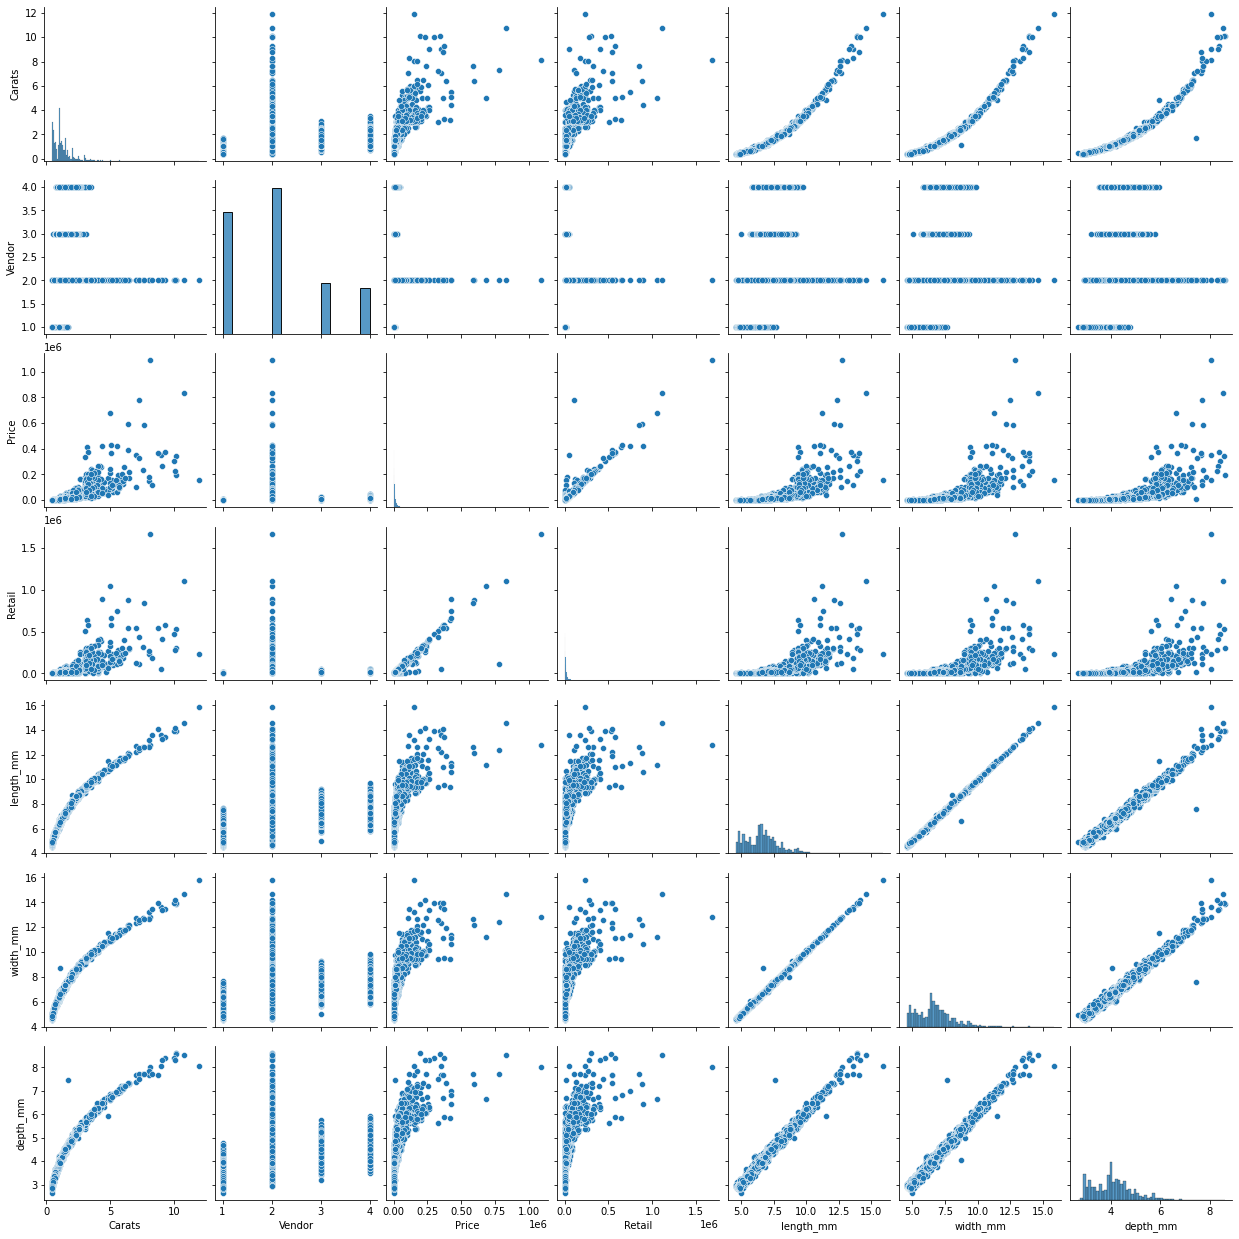

In [31]:
sns.pairplot(df_Price)

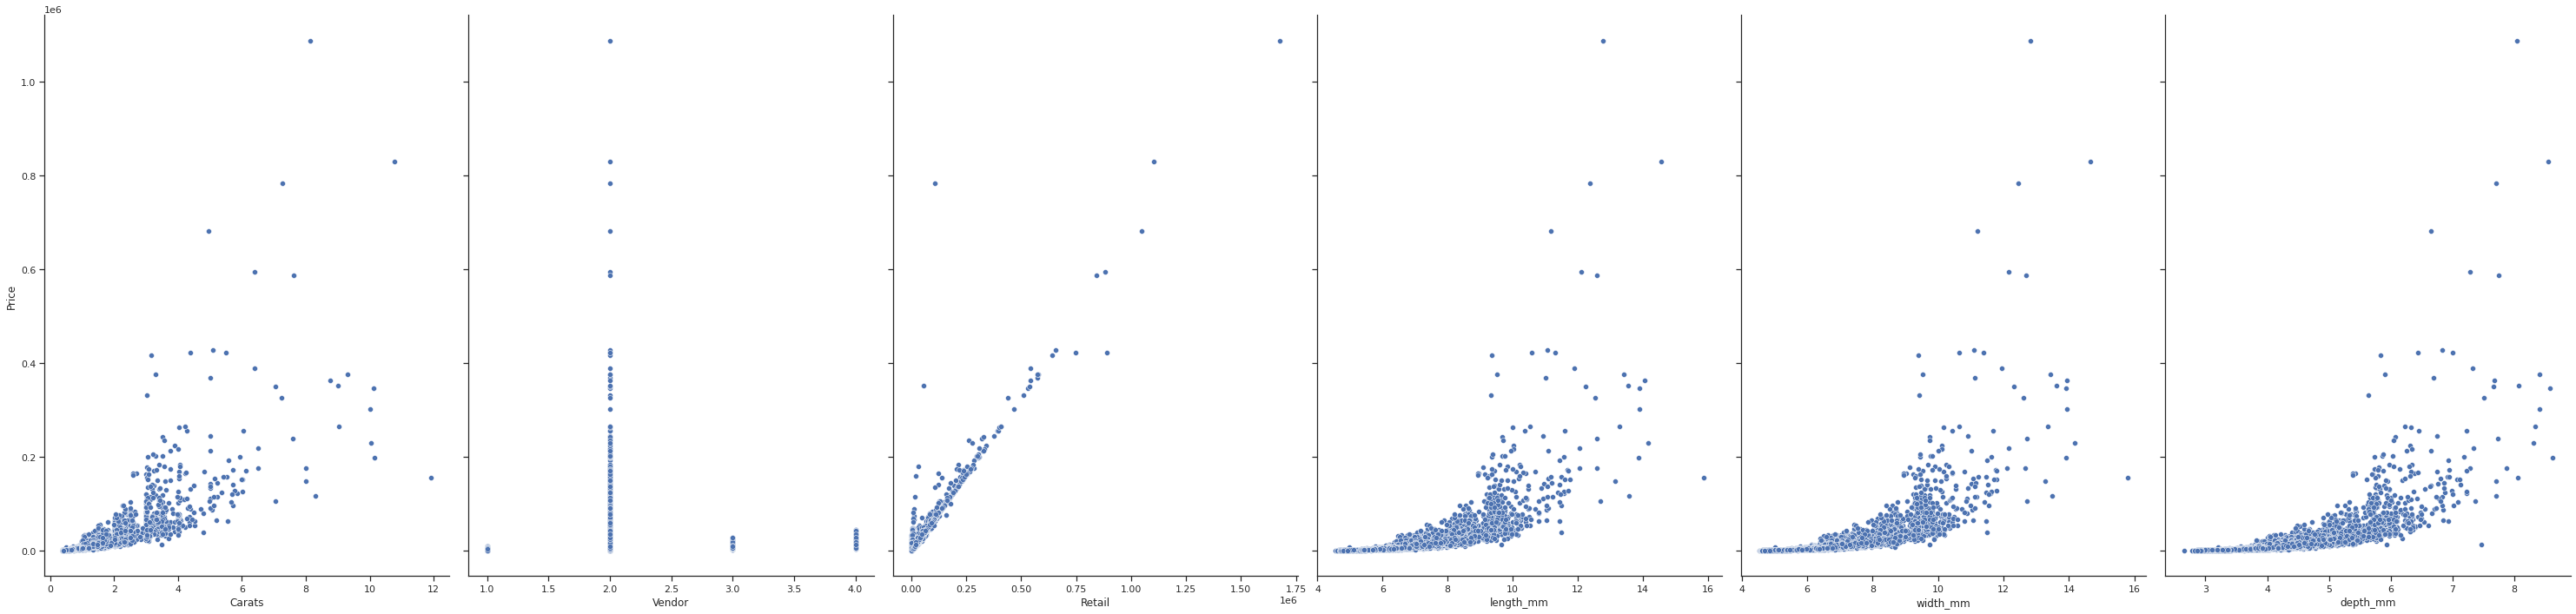

In [50]:

p = sns.pairplot(df_Price, x_vars=['Carats','Vendor', 'Retail', 'length_mm',
       'width_mm', 'depth_mm'], y_vars='Price', size=10, aspect=0.7)

## Vendor versus Price

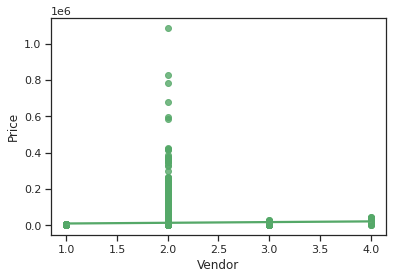

In [49]:
# plots between independent variables and price that is target
sns.regplot(x=df.Vendor, y=df.Price, color='g')

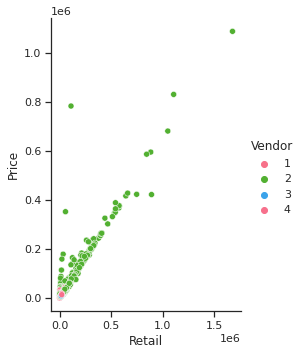

In [44]:
p = sns.pairplot(df_Price, x_vars=['Retail'], y_vars='Price', hue = 'Vendor', palette='husl' ,size=5, aspect=0.7)

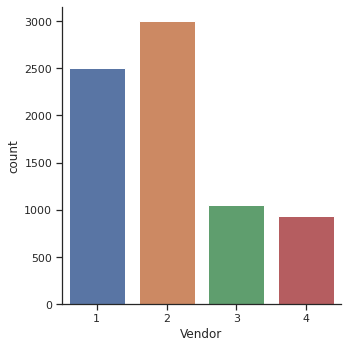

In [45]:
sns.factorplot('Vendor',data=df,kind='count')

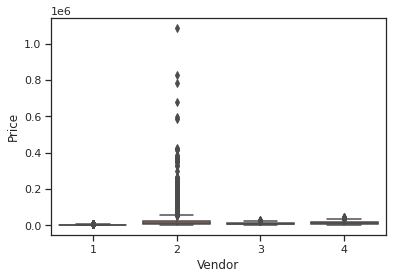

In [46]:
sns.boxplot(data = df, x='Vendor', y='Price')

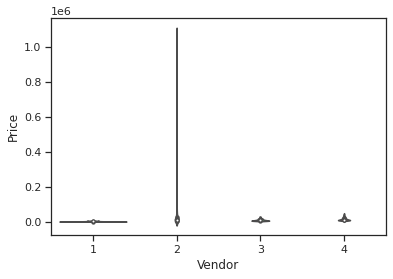

In [48]:
sns.violinplot(data = df, x='Vendor', y='Price')
# sns.swarmplot(data = df, x='Vendor', y='Price', color = 'k', alpha = 0.6)

## Carat vs Retail Price

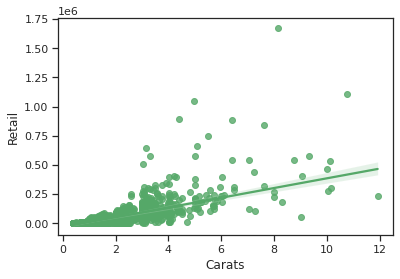

In [54]:
# plots between independent variables and price that is target
sns.regplot(x=df.Carats, y=df.Retail, color='g')

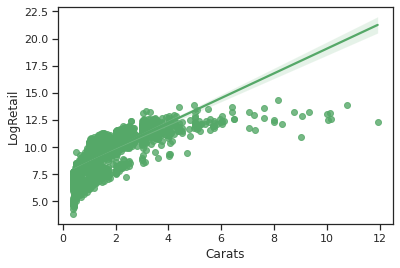

In [56]:
# plots between independent variables and price that is target

sns.regplot(x=df.Carats, y=df.LogRetail, color='g')

## #Linear Model for predicting the price while taking the carats only

We will start with a simple linear regression model with only one covariate, 'Carats', predicting 'Price'.The lines of code below fits the univariate linear regression model and prints a summary of the result.

R2 is the coefficient of determination that tells us that how much percentage variation in dependent variable can be explained by independent variable.

In [59]:
y = df.Carats
X = df.Retail

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# # Printing the parameters
print(lr.params)

# Performing a summary to list out all the different parameters of the regression line fitted
print(lr.summary())

const     0.992798
Retail    0.000012
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Carats   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     6262.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:09:52   Log-Likelihood:                -5514.4
No. Observations:                5998   AIC:                         1.103e+04
Df Residuals:                    5996   BIC:                         1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [61]:
X.dtypes

Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Known_Conflict_Diamond       bool
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                      int64
length_mm                 float64
width_mm                  float64
depth_mm                  float64
dtype: object

## Historgram for all

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32398de650>,
      dtype=object)

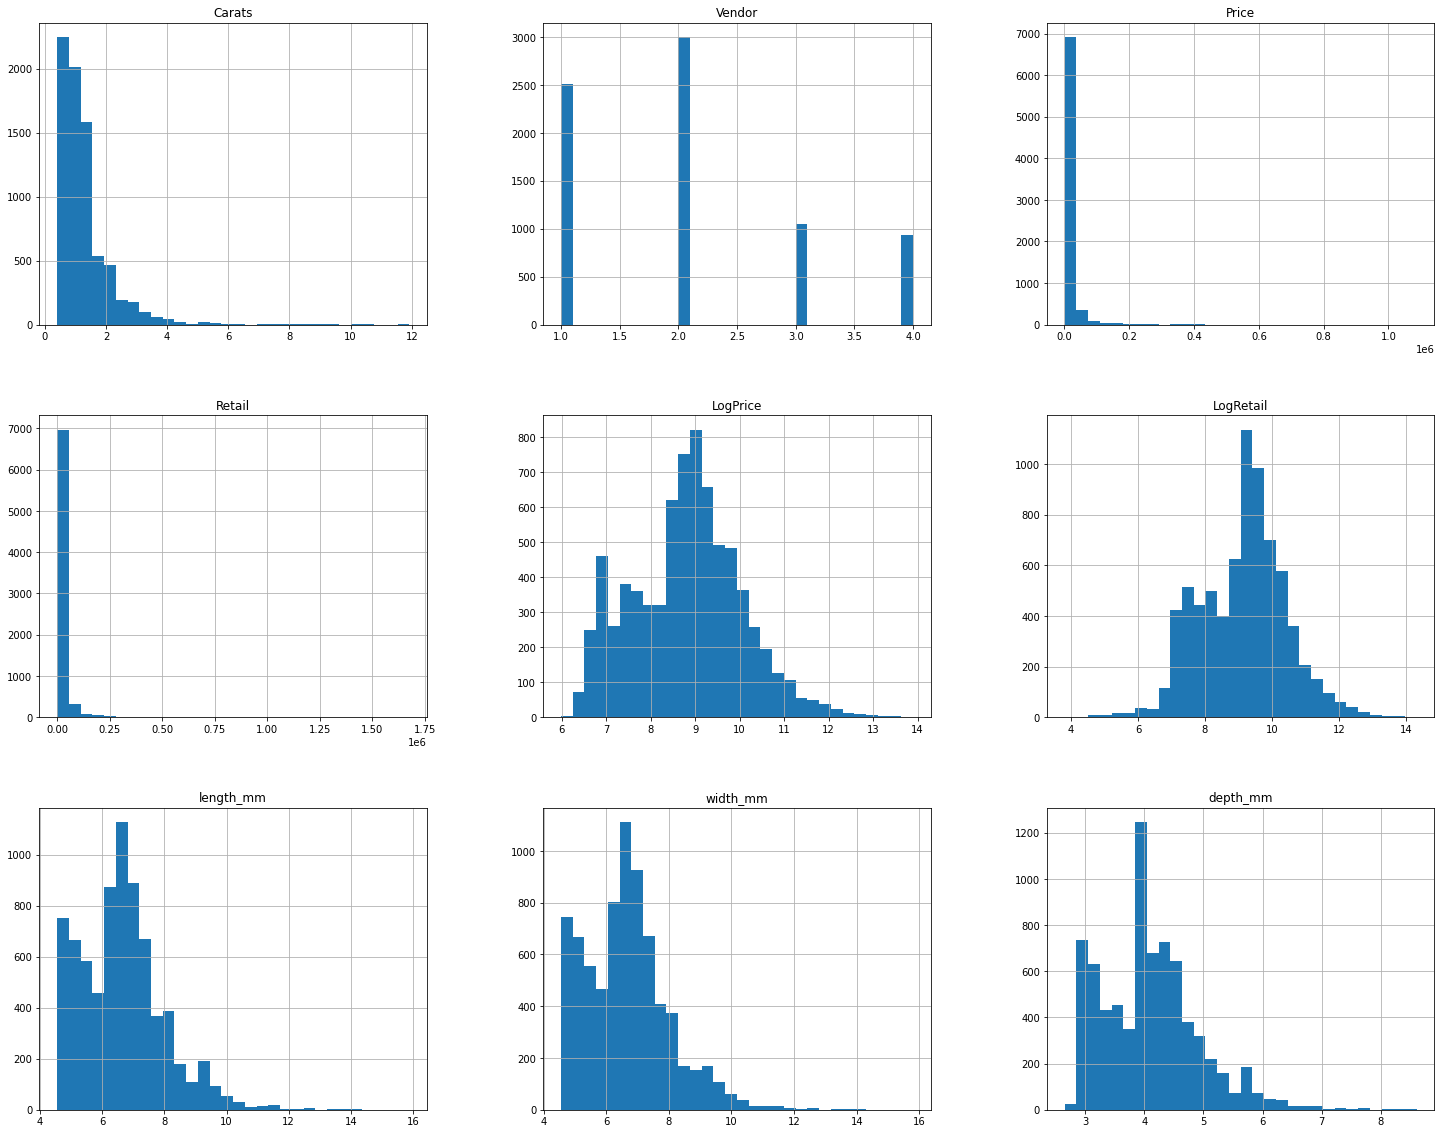

In [15]:
#Check for normal distribution
df.hist(bins = 30, figsize= (25,20))

In [64]:
all_df = df.copy()
all_df

,Carats,Cert,Clarity,Color,Cut,Known_Conflict_Diamond,Polish,Regions,Shape,Symmetry,Vendor,Price,Retail,LogPrice,LogRetail,length_mm,width_mm,depth_mm
1,0.42,AGSL,SI2,L,,False,Excellent,Russia,Marquise,Very good,1,560,920,6.327937,6.824374,4.85,4.79,2.98
2,0.40,AGSL,SI1,L,,False,Excellent,South Africa,Round,Excellent,1,560,575,6.327937,6.354370,4.66,4.63,2.97
3,0.41,AGSL,SI2,L,,False,Very good,Botswana,Round,Very good,1,560,825,6.327937,6.715383,4.71,4.69,2.95
4,0.40,AGSL,SI1,L,,False,Excellent,Botswana,Round,Very good,1,580,890,6.363028,6.791221,4.71,4.68,2.96
5,0.40,AGSL,VS2,M,,False,Very good,Botswana,Round,Very good,1,580,945,6.363028,6.851185,4.75,4.74,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,1.90,GemEx,SI2,K,Good,False,Very good,Botswana,ROUND,Good,3,11115,17090,9.316051,9.746249,8.07,7.96,4.88
8045,3.51,AGSL,VS1,D,Excellent,False,Excellent,DR Congo,Round,Excellent,2,201685,299320,12.214462,12.609269,9.75,9.82,6.03
8047,7.62,AGSL,IF,H,Excellent,False,Excellent,South Africa,Round,Excellent,2,586790,842730,13.282422,13.644402,12.60,12.68,7.74
8048,1.49,AGSL,VS1,K,Very good,False,Good,Russia,Round,Good,3,9490,14775,9.157994,9.600692,7.22,7.34,4.53


In [ ]:

#droppingprice and retail because we will be taking the normalised log values for our model

df.drop("Price", axis=1, inplace=True)
df.drop("Retail", axis=1, inplace=True)

In [ ]:
df.dtypes

Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Known_Conflict_Diamond       bool
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                      int64
LogPrice                  float64
LogRetail                 float64
length_mm                 float64
width_mm                  float64
depth_mm                  float64
dtype: object

In [ ]:
#% missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Carats,Carats,0.0
Cert,Cert,0.0
Clarity,Clarity,0.0
Color,Color,0.0
Cut,Cut,0.0
Known_Conflict_Diamond,Known_Conflict_Diamond,0.0
Polish,Polish,0.0
Regions,Regions,0.0
Shape,Shape,0.0
Symmetry,Symmetry,0.0


In [ ]:
df.Vendor = df.Vendor.astype(str)
df.Known_Conflict_Diamond = df.Known_Conflict_Diamond.astype(int)

In [ ]:
df.dtypes

Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Known_Conflict_Diamond      int64
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                     object
LogPrice                  float64
LogRetail                 float64
length_mm                 float64
width_mm                  float64
depth_mm                  float64
dtype: object

In [ ]:
df.head()

,Carats,Cert,Clarity,Color,Cut,Known_Conflict_Diamond,Polish,Regions,Shape,Symmetry,Vendor,LogPrice,LogRetail,length_mm,width_mm,depth_mm
1,0.42,AGSL,SI2,L,,False,Excellent,Russia,Marquise,Very good,1,6.327937,6.824374,4.85,4.79,2.98
2,0.40,AGSL,SI1,L,,False,Excellent,South Africa,Round,Excellent,1,6.327937,6.354370,4.66,4.63,2.97
3,0.41,AGSL,SI2,L,,False,Very good,Botswana,Round,Very good,1,6.327937,6.715383,4.71,4.69,2.95
4,0.40,AGSL,SI1,L,,False,Excellent,Botswana,Round,Very good,1,6.363028,6.791221,4.71,4.68,2.96
5,0.40,AGSL,VS2,M,,False,Very good,Botswana,Round,Very good,1,6.363028,6.851185,4.75,4.74,2.84


In [ ]:
df.columns.values[df.dtypes == 'object']

array(['Cert', 'Clarity', 'Color', 'Cut', 'Polish', 'Regions', 'Shape',
       'Symmetry', 'Vendor'], dtype=object)

In [ ]:
cat_var = ['Cert', 'Clarity', 'Color', 'Cut', 'Polish', 'Regions', 'Shape',
       'Symmetry', 'Vendor']

In [ ]:
df.columns

Index(['Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Known_Conflict_Diamond',
       'Polish', 'Regions', 'Shape', 'Symmetry', 'Vendor', 'LogPrice',
       'LogRetail', 'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

# One hot key encoding

In [ ]:
df = pd.get_dummies(df, columns=['Cert', 'Clarity', 'Color', 'Cut', 'Polish', 'Regions', 'Shape',
       'Symmetry', 'Vendor'])

In [ ]:
len(df.columns.values)

96

### Linear Regression with all 94 features for logPrice prediction

In [ ]:
df.columns

Index(['Carats', 'Known_Conflict_Diamond', 'LogPrice', 'LogRetail',
       'length_mm', 'width_mm', 'depth_mm', 'Cert_AGSL', 'Cert_GemEx',
       'Clarity_FL', 'Clarity_I1', 'Clarity_I2', 'Clarity_I3', 'Clarity_IF',
       'Clarity_N', 'Clarity_None', 'Clarity_SI1', 'Clarity_SI2',
       'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Color_D',
       'Color_E', 'Color_F', 'Color_Fdpink', 'Color_Fdy', 'Color_Ffcdbrown',
       'Color_Ffcg', 'Color_Ffcly', 'Color_Ffg', 'Color_Fiy', 'Color_Fiyellow',
       'Color_Fly', 'Color_Flyellow', 'Color_Fvyellow', 'Color_Fyellow',
       'Color_G', 'Color_Gy', 'Color_H', 'Color_I', 'Color_J', 'Color_K',
       'Color_L', 'Color_Lb', 'Color_M', 'Color_N', 'Color_O-p', 'Color_P',
       'Color_Q-r', 'Color_S', 'Color_U', 'Color_W', 'Cut_ ', 'Cut_Excellent',
       'Cut_Fair', 'Cut_Good', 'Cut_Ideal', 'Cut_Very good', 'Polish_ ',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia'

In [ ]:
from sklearn.model_selection import train_test_split

#94 features
fea_94 = ['Carats', 'Known_Conflict_Diamond',
       'length_mm', 'width_mm', 'depth_mm', 'Cert_AGSL', 'Cert_GemEx',
       'Clarity_FL', 'Clarity_I1', 'Clarity_I2', 'Clarity_I3', 'Clarity_IF',
       'Clarity_N', 'Clarity_None', 'Clarity_SI1', 'Clarity_SI2',
       'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Color_D',
       'Color_E', 'Color_F', 'Color_Fdpink', 'Color_Fdy', 'Color_Ffcdbrown',
       'Color_Ffcg', 'Color_Ffcly', 'Color_Ffg', 'Color_Fiy', 'Color_Fiyellow',
       'Color_Fly', 'Color_Flyellow', 'Color_Fvyellow', 'Color_Fyellow',
       'Color_G', 'Color_Gy', 'Color_H', 'Color_I', 'Color_J', 'Color_K',
       'Color_L', 'Color_Lb', 'Color_M', 'Color_N', 'Color_O-p', 'Color_P',
       'Color_Q-r', 'Color_S', 'Color_U', 'Color_W', 'Cut_ ', 'Cut_Excellent',
       'Cut_Fair', 'Cut_Good', 'Cut_Ideal', 'Cut_Very good', 'Polish_ ',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia', 'Regions_Botswana', 'Regions_Canada',
       'Regions_DR Congo', 'Regions_Other/Unknown', 'Regions_Russia',
       'Regions_South Africa', 'Regions_Zimbabwe', 'Shape_Asscher',
       'Shape_Cushion', 'Shape_Emerald', 'Shape_Marquis', 'Shape_Marquise',
       'Shape_Oval', 'Shape_Oval ', 'Shape_Pear', 'Shape_Princess',
       'Shape_ROUND', 'Shape_Radiant', 'Shape_Round', 'Shape_Uncut',
       'Symmetry_ ', 'Symmetry_Excellent', 'Symmetry_Execllent',
       'Symmetry_Faint', 'Symmetry_Fair', 'Symmetry_Good',
       'Symmetry_Very good', 'Vendor_1', 'Vendor_2', 'Vendor_3', 'Vendor_4']

X94 = df[fea_94]
y94 = df["LogPrice"]

X_train94, X_test94, y_train94, y_test94 = train_test_split(X94, y94, test_size=0.2, random_state=0)


regressor = LinearRegression()  
regressor.fit(X_train94, y_train94) #training the algorithm

# #To retrieve the intercept:
# print(regressor.intercept_)

# #For retrieving the slope:
# print(regressor.coef_)

y_pred94 = regressor.predict(X_test94)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test94, y_pred94))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test94, y_pred94))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test94, y_pred94)))


Mean Absolute Error: 9021436.990829093
Mean Squared Error: 1.2207948495407312e+17
Root Mean Squared Error: 349398747.78549665


In [ ]:
res = pd.DataFrame({'Actual': y_test94, 'Predicted': y_pred94})
res.index = np.arange(1, len(res)+1)
res


,Actual,Predicted
1,9.010058,8.865662
2,9.061840,9.060638
3,9.570459,9.800262
4,8.987197,8.861328
5,10.066456,9.902924
...,...,...
1496,9.247636,9.386444
1497,9.200290,9.327301
1498,6.413459,6.260162
1499,10.552813,10.734436


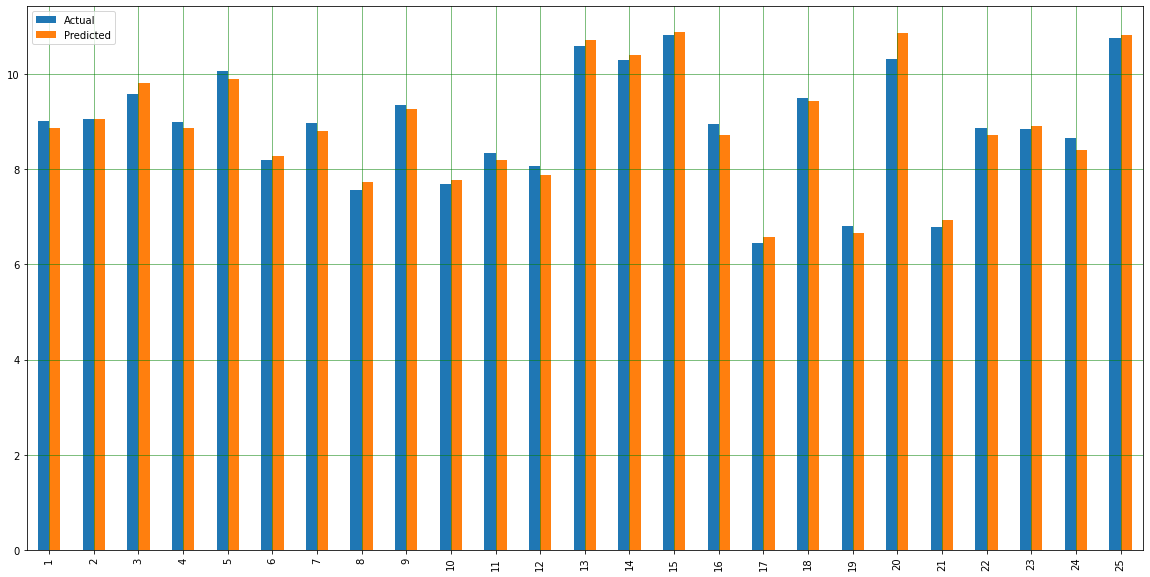

In [ ]:
df1 = res.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# 1. 1st Model to Predict the log Offer Price

## Statistical Significance

df is the final DF. We work with X which is a copy of this DF.

There is one universal component to all of the statistical tests: they all generate a P-value. If the P-value is greater than 0.05, then we typically reject a hypothesis, and we accept a hypothesis with a P-value below 0.05.

We want to use only those predictors which are statistically significant.

In [ ]:
X = df.copy()
X = X.drop(['LogRetail'], axis=1)

In [ ]:
X.columns

Index(['Carats', 'Known_Conflict_Diamond', 'LogPrice', 'length_mm', 'width_mm',
       'depth_mm', 'Cert_AGSL', 'Cert_GemEx', 'Clarity_FL', 'Clarity_I1',
       'Clarity_I2', 'Clarity_I3', 'Clarity_IF', 'Clarity_N', 'Clarity_None',
       'Clarity_SI1', 'Clarity_SI2', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Color_D', 'Color_E', 'Color_F',
       'Color_Fdpink', 'Color_Fdy', 'Color_Ffcdbrown', 'Color_Ffcg',
       'Color_Ffcly', 'Color_Ffg', 'Color_Fiy', 'Color_Fiyellow', 'Color_Fly',
       'Color_Flyellow', 'Color_Fvyellow', 'Color_Fyellow', 'Color_G',
       'Color_Gy', 'Color_H', 'Color_I', 'Color_J', 'Color_K', 'Color_L',
       'Color_Lb', 'Color_M', 'Color_N', 'Color_O-p', 'Color_P', 'Color_Q-r',
       'Color_S', 'Color_U', 'Color_W', 'Cut_ ', 'Cut_Excellent', 'Cut_Fair',
       'Cut_Good', 'Cut_Ideal', 'Cut_Very good', 'Polish_ ',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia', 'Regions_Bo

In [ ]:

y = X.pop("LogPrice")

# Splitting the varaibles as training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# # Printing the parameters
# print(lr.params)

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4511.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:35:59   Log-Likelihood:                 2665.2
No. Observations:                5998   AIC:                            -5168.
Df Residuals:                    5917   BIC:                            -4626.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4836      0.023     20.655      0.000       0.438       0.530
Carats                    -0.5836      0.009    -62.668      0.000      -0.602      -0.565
Known_Conflict_Diamond     0.0251      0.012      2.154      0.031       0.002       0.048
length_mm                  0.1624      0.049      3.340      0.001       0.067       0.258
width_mm                   0.6276      0.047     13.318      0.000       0.535       0.720
depth_mm                   0.6682      0.021     31.802      0.000       0.627       0.709
Cert_AGSL                  0.2492      0.012     20.519      0.000       0.225       0.273
Cert_GemEx                 0.2344      0.013     18.640      0.000       0.210       0.259
Clarity_FL                 0.9536      0.145      6.591      0.000       0.670       1.237
Clarity_I1                -0.3731      0.025    -15.159      0.000      -0.421      -0.325
Clarity_I2                -0.6645      0.051    -13.052      0.000      -0.764      -0.565
Clarity_I3                -0.8535      0.145     -5.888      0.000      -1.138      -0.569
Clarity_IF                 0.6084      0.025     24.711      0.000       0.560       0.657
Clarity_N                 -0.0863      0.054     -1.593      0.111      -0.193       0.020
Clarity_None               0.0081      0.076      0.107      0.915      -0.140       0.156
Clarity_SI1                0.0184      0.021      0.895      0.371      -0.022       0.059
Clarity_SI2               -0.1113      0.021     -5.421      0.000      -0.152      -0.071
Clarity_VS1                0.2144      0.021     10.293      0.000       0.174       0.255
Clarity_VS2                0.1438      0.021      6.959      0.000       0.103       0.184
Clarity_VVS1               0.3540      0.023     15.386      0.000       0.309       0.399
Clarity_VVS2               0.2715      0.022     12.514      0.000       0.229       0.314
Color_D                    0.5259      0.024     22.355      0.000       0.480       0.572
Color_E                    0.3971      0.023     16.999      0.000       0.351       0.443
Color_F                    0.3364      0.023     14.400      0.000       0.291       0.382
Color_Fdpink               0.7052      0.153      4.611      0.000       0.405       1.005
Color_Fdy                 -0.0863      0.054     -1.593      0.111      -0.193       0.020
Color_Ffcdbrown           -0.8875      0.153     -5.817      0.000      -1.187      -0.588
Color_Ffcg                -0.0198      0.154     -0.129      0.898      -0.321       0.281
Color_Ffcly               -0.6876      0.153     -4.504      0.000      -0.987      -0.388
Color_Ffg                  0.6320      0.110      5.765      0.000       0.417       0.847
Color_Fiy                  0.1109      0.153      0.725      0.469      -0.189  

In [ ]:
LRresult = (lr.summary().tables[1])

type(LRresult)
# Note that tables is a list. 
#The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0

results_as_html = LRresult.as_html()

summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
# summary_df.columns

df_sum = summary_df.sort_values(by = ['P>|t|'])

#getting only those columns where the p value is less than 0.05
df_sum.head(77)


,coef,std err,t,P>|t|,[0.025,0.975]
const,0.4836,0.023,20.655,0.000,0.438,0.530
Regions_Angola,0.0602,0.008,7.737,0.000,0.045,0.075
Polish_Very good,0.1290,0.011,11.486,0.000,0.107,0.151
Polish_Good,0.0933,0.015,6.384,0.000,0.065,0.122
Polish_Excellent,0.1498,0.011,13.026,0.000,0.127,0.172
...,...,...,...,...,...,...
Color_N,-0.3493,0.115,-3.044,0.002,-0.574,-0.124
Cut_,0.0727,0.027,2.691,0.007,0.020,0.126
Color_I,0.0508,0.023,2.180,0.029,0.005,0.097
Known_Conflict_Diamond,0.0251,0.012,2.154,0.031,0.002,0.048


In [ ]:
#getting only those columns where the p value is less than 0.05
df_sum.head(77).index

Index(['const', 'Regions_Angola', 'Polish_Very good', 'Polish_Good',
       'Polish_Excellent', 'Polish_', 'Cut_Very good', 'Cut_Good',
       'Cut_Excellent', 'Color_U', 'Color_Q-r', 'Vendor_3', 'Color_O-p',
       'Color_M', 'Color_Lb', 'Color_L', 'Regions_Australia',
       'Regions_Botswana', 'Regions_Canada', 'Regions_DR Congo', 'Vendor_2',
       'Symmetry_', 'Shape_Uncut', 'Shape_Round', 'Shape_Radiant',
       'Shape_ROUND', 'Shape_Princess', 'Color_K', 'Shape_Pear',
       'Shape_Marquise', 'Shape_Emerald', 'Shape_Cushion', 'Shape_Asscher',
       'Regions_South Africa', 'Regions_Russia', 'Regions_Other/Unknown',
       'Shape_Oval', 'Color_J', 'Color_P', 'Clarity_VS1', 'Color_E', 'Color_D',
       'Clarity_VVS2', 'Clarity_VVS1', 'Clarity_VS2', 'Color_H', 'Clarity_SI2',
       'Clarity_IF', 'Clarity_I3', 'Clarity_I2', 'Clarity_I1', 'Clarity_FL',
       'Cert_GemEx', 'Cert_AGSL', 'depth_mm', 'width_mm', 'Carats', 'Color_F',
       'Color_Fdpink', 'Vendor_4', 'Color_Ffcdbrown', 

### 76 significant features

In [ ]:
Sig_col = ['Regions_Angola', 'Polish_Very good', 'Polish_Good',
       'Polish_Excellent', 'Polish_ ', 'Cut_Very good', 'Cut_Good',
       'Cut_Excellent', 'Color_U', 'Color_Q-r', 'Vendor_3', 'Color_O-p',
       'Color_M', 'Color_Lb', 'Color_L', 'Regions_Australia',
       'Regions_Botswana', 'Regions_Canada', 'Regions_DR Congo', 'Vendor_2',
       'Symmetry_ ', 'Shape_Uncut', 'Shape_Round', 'Shape_Radiant',
       'Shape_ROUND', 'Shape_Princess', 'Color_K', 'Shape_Pear',
       'Shape_Marquise', 'Shape_Emerald', 'Shape_Cushion', 'Shape_Asscher',
       'Regions_South Africa', 'Regions_Russia', 'Regions_Other/Unknown',
       'Shape_Oval', 'Color_J', 'Color_P', 'Clarity_VS1', 'Color_E', 'Color_D',
       'Clarity_VVS2', 'Clarity_VVS1', 'Clarity_VS2', 'Color_H', 'Clarity_SI2',
       'Clarity_IF', 'Clarity_I3', 'Clarity_I2', 'Clarity_I1', 'Clarity_FL',
       'Cert_GemEx', 'Cert_AGSL', 'depth_mm', 'width_mm', 'Carats', 'Color_F',
       'Color_Fdpink', 'Vendor_4', 'Color_Ffcdbrown', 'Color_Gy',
       'Color_Ffcly', 'Color_G', 'Color_Fvyellow', 'Color_Ffg',
       'Symmetry_Execllent', 'length_mm', 'Color_Fiyellow', 'Shape_Marquis',
       'Shape_Oval', 'Regions_Zimbabwe', 'Color_N', 'Cut_ ', 'Color_I',
       'Known_Conflict_Diamond', 'Symmetry_Fair']

In [ ]:
len(Sig_col)

76

## 3 Assumptions for Linear Regression Model


1.   All variables follow a normal distribution  (All ready checked bcoz of usage of MinMaxScalar)
2.   There is very little or no multicollinearity (Check with coorelation & Mutual Information Score)
3.  We are investigating a linear relationship (check for those which are selected from assumption2)





Very High Correlation between Retail & price - this was expected & obvious too : we drop one while predicting the other

In [ ]:
X1 = df.copy()
X1 = X1[Sig_col]
y1 = df["LogPrice"]

In [ ]:
X1.shape

(7498, 76)

In [ ]:
y1.shape

(7498,)

### Mutual Information Score among 76 Significant variables

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.In our case we have a lot of categorical varaibles as well and hence Coorelation matrix isnt the right choice
If we knew the value of a feature, how much more confident would we be about the target? - This is what Mutual Information Score measures



In [ ]:
X1.dtypes

Regions_Angola            int64
Polish_Very good          int64
Polish_Good               int64
Polish_Excellent          int64
Polish_                   int64
                          ...  
Color_N                   int64
Cut_                      int64
Color_I                   int64
Known_Conflict_Diamond    int64
Symmetry_Fair             int64
Length: 76, dtype: object

In [ ]:
for i in X1:
  X1[i] = X1[i].astype(int)

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X1.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X1, y1, discrete_features):
    mi_scores = mutual_info_regression(X1, y1, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X1.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X1, y1, discrete_features)

In [ ]:
mi_score_pd = pd.DataFrame(mi_scores)
mi_score_pd.sort_values(by = ['MI Scores'], ascending=False)

MI_col = []
for row in mi_score_pd[:21].index:
    MI_col.append(row)

MI_col

['width_mm',
 'length_mm',
 'depth_mm',
 'Carats',
 'Vendor_2',
 'Vendor_4',
 'Cut_Excellent',
 'Vendor_3',
 'Cut_ ',
 'Polish_Excellent',
 'Clarity_SI2',
 'Polish_Very good',
 'Symmetry_ ',
 'Polish_ ',
 'Color_E',
 'Color_J',
 'Color_I',
 'Color_F',
 'Color_K',
 'Cut_Very good',
 'Color_H']

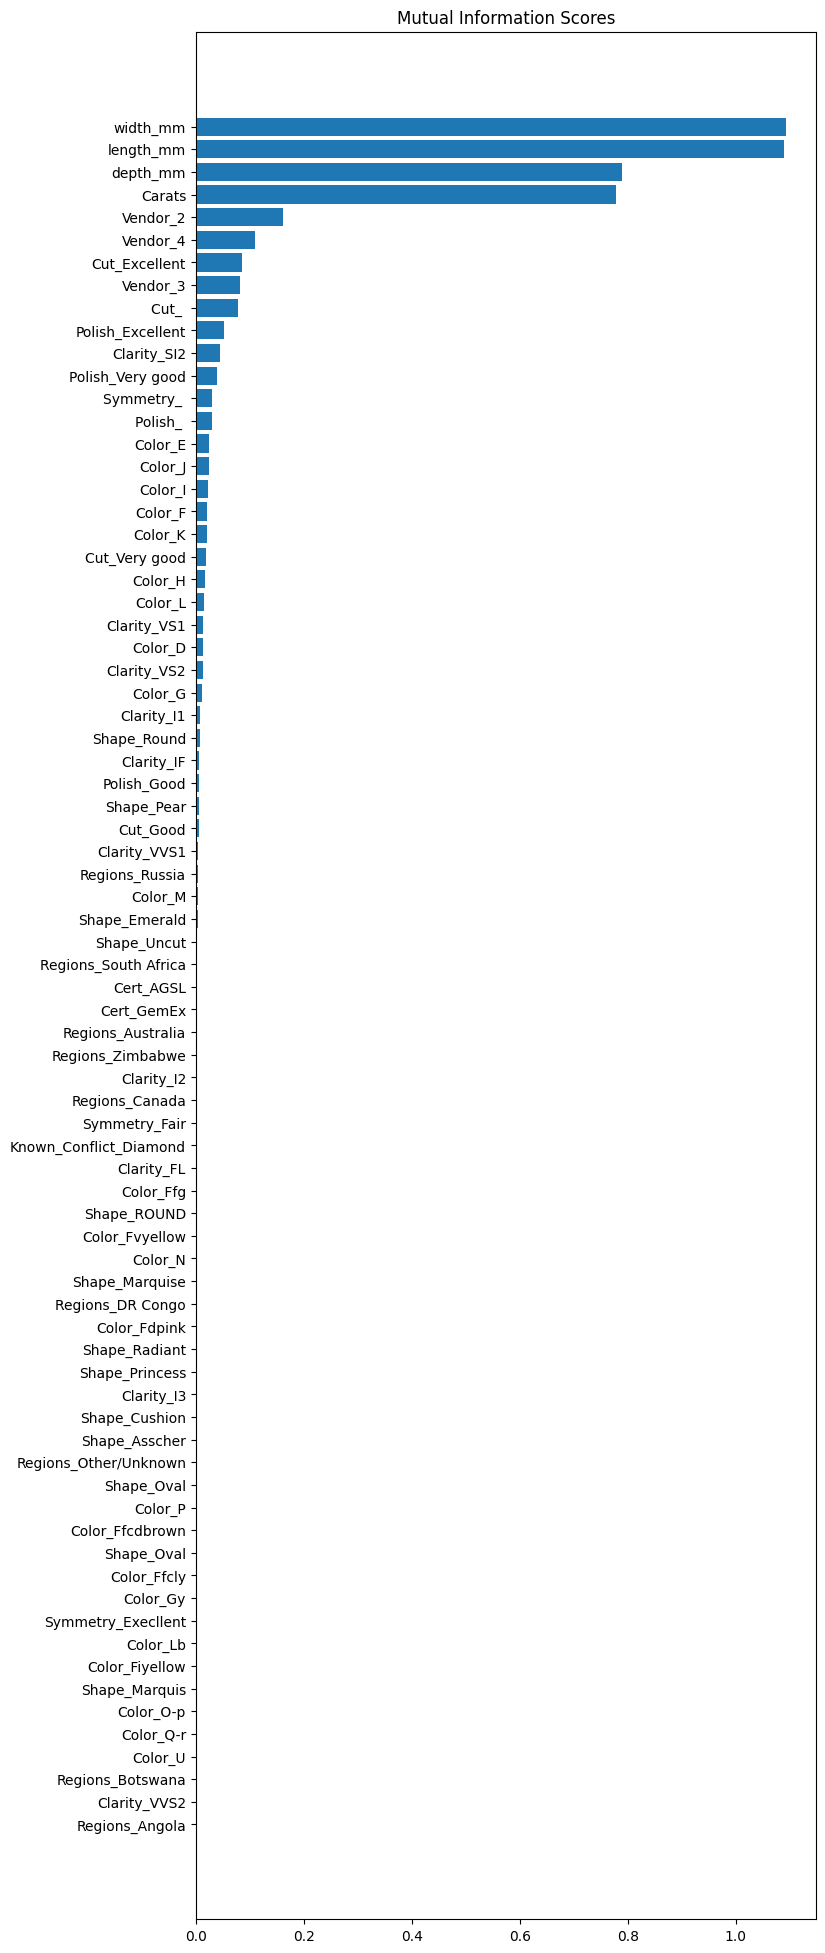

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 25))
plot_mi_scores(mi_scores)

## Prediction with 21 features

In [ ]:
#21 features
X21 = df[MI_col]
y21 = df["LogPrice"]

X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, test_size=0.2, random_state=0)


regressor21 = LinearRegression()  
regressor21.fit(X_train21, y_train21) #training the algorithm


y_pred21 = regressor21.predict(X_test21)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test21, y_pred21))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test21, y_pred21))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test21, y_pred21)))

Mean Absolute Error: 0.17742297328479523
Mean Squared Error: 0.0667004965683207
Root Mean Squared Error: 0.25826439276121804


## Recursive Feature Elimination - feature selection (21 features with high MI scores)

Recursive Feature elimination: Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

In [ ]:
#splitting the data
X2 = df.copy()
X2 = X2[MI_col]
y2 = df["LogPrice"]


In [ ]:
type(y2)

pandas.core.series.Series

In [ ]:
y2 = y2.astype('int64')

In [ ]:
X2.dtypes

Cut_Excellent    float64
Clarity_SI2      float64
Color_E          float64
Color_J          float64
Color_I          float64
Color_K          float64
Color_H          float64
Color_F          float64
Clarity_SI1      float64
Color_G          float64
Clarity_VS2      float64
Color_L          float64
Clarity_VS1      float64
Clarity_I1       float64
Clarity_IF       float64
Clarity_VVS1     float64
Color_M          float64
Clarity_VVS2     float64
Shape_Pear       float64
Shape_Uncut      float64
Clarity_I2       float64
dtype: object

In [ ]:
for col in X2.columns.values:
  X2[col] = X2[col].astype('int64')


In [ ]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg,n_features_to_select=11)
rfe = rfe.fit(X2,y2)


print(rfe.ranking_)

[ 1  1  2  1  1  1  7  1  1  6  1  3  5  8  9  1  4 11  1  1 10]


In [ ]:
print(rfe.support_)

[ True  True False  True  True  True False  True  True False  True False
 False False False  True False False  True  True False]


In [ ]:
j= list(X2.columns)
k = list(rfe.ranking_)

print([elem for idx,elem in enumerate(j) if k[idx]==1])

['width_mm', 'length_mm', 'Carats', 'Vendor_2', 'Vendor_4', 'Vendor_3', 'Cut_ ', 'Clarity_SI2', 'Color_J', 'Color_K', 'Cut_Very good']


In [ ]:
RFE_col = [elem for idx,elem in enumerate(j) if k[idx]==1]
RFE_col

['width_mm',
 'length_mm',
 'Carats',
 'Vendor_2',
 'Vendor_4',
 'Vendor_3',
 'Cut_ ',
 'Clarity_SI2',
 'Color_J',
 'Color_K',
 'Cut_Very good']

### Linear Relationship (11 final predictors) with the target varaible (assumption for Linear Model)

## Linear Model for Price Prediction after RFE 11 features

In [ ]:
#11 features
X11 = df[RFE_col]
y11 = df["LogPrice"]


X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=0)

regressor.fit(X_train11, y_train11) #training the algorithm


y_pred11 = regressor.predict(X_test11)


### Metrics for Best features(Linear Model with 11 features)

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test11, y_pred11))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test11, y_pred11))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test11, y_pred11)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test11,y_pred11))

Mean Absolute Error: 0.21132108502037125
Mean Squared Error: 0.08704931478442171
Root Mean Squared Error: 0.2950412086207988
Mean Absolute % Error: 2.4177277313463508


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test21, y_pred21))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test21, y_pred21))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test21, y_pred21)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test21,y_pred21))

Mean Absolute Error: 0.17742297328479523
Mean Squared Error: 0.0667004965683207
Root Mean Squared Error: 0.25826439276121804
Mean Absolute % Error: 2.0448080254571415


## With 11 MI Features

In [ ]:
MI_col11 = ['width_mm',
 'length_mm',
 'depth_mm',
 'Carats',
 'Vendor_2',
 'Vendor_4',
 'Cut_Excellent',
 'Vendor_3',
 'Cut_ ',
 'Polish_Excellent',
 'Clarity_SI2']

In [ ]:
X_MI11 = df[MI_col11]
y_MI11 = df["LogPrice"]


X_trainMI11, X_testMI11, y_trainMI11, y_testMI11 = train_test_split(X_MI11, y_MI11, test_size=0.2, random_state=0)

regressor.fit(X_trainMI11, y_trainMI11) #training the algorithm


y_predMI11 = regressor.predict(X_testMI11)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testMI11, y_predMI11))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testMI11, y_predMI11))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testMI11, y_predMI11)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_testMI11,y_predMI11))

Mean Absolute Error: 0.24428808747382458
Mean Squared Error: 0.10210024690345047
Root Mean Squared Error: 0.31953129252617885
Mean Absolute % Error: 2.8064783583182953


### We see that the best performance on test data is given by the 21 features selected as per MI score and we use this to predict the offer price on the test data set.

## Final Price Prediction on Test data with the 21 features from this model

### Load the test data

In [ ]:
test = pd.read_csv('offers.csv')

In [ ]:
test.shape[0]

2683

In [ ]:
#use 21 features as per top MI score
#doing all the data pre processing which we had done on the training data - we need data in that format for prediction
# one of the measurements had * instead of x - this was found in python code and rectified in excel
test[['length_mm', 'width_mm', 'depth_mm']] = test['Measurements'].str.split('x', expand=True)
test.drop("Measurements", axis=1, inplace=True)
test.columns


Index(['id', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth',
       'Known_Conflict_Diamond', 'Polish', 'Regions', 'Shape', 'Symmetry',
       'Table', 'Vendor', 'Offers', 'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [ ]:
test['length_mm']=test['length_mm'].astype(float)
test['width_mm']=test['width_mm'].astype(float)
test['depth_mm']=test['depth_mm'].astype(float)

# test.drop("id", axis=1, inplace=True)

In [ ]:
test.Vendor = test.Vendor.astype(str)
# test.Known_Conflict_Diamond = test.Known_Conflict_Diamond.astype(int)

In [ ]:
test.dtypes

id                          int64
Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Depth                     float64
Known_Conflict_Diamond     object
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Table                     float64
Vendor                     object
Offers                    float64
length_mm                 float64
width_mm                  float64
depth_mm                  float64
dtype: object

In [ ]:
cat_var_test = test.loc[:,test.dtypes==np.object]
cat_var_test

,Cert,Clarity,Color,Cut,Known_Conflict_Diamond,Polish,Regions,Shape,Symmetry,Vendor
0,AGSL,SI2,L,,NaN,Excellent,Australia,Round,Excellent,1
1,GemEx,VS2,M,,NaN,Excellent,Australia,Round,Excellent,1
2,AGSL,SI2,L,,True,Excellent,DR Congo,Round,Very good,1
3,AGSL,SI1,K,,False,Very good,Angola,Emerald,Very good,1
4,AGSL,VS2,L,,False,Excellent,Russia,Round,Very good,1
...,...,...,...,...,...,...,...,...,...,...
2678,AGSL,VS1,E,Excellent,NaN,Excellent,Canada,Pear,Excellent,4
2679,AGSL,SI2,E,Excellent,True,Excellent,Angola,Round,Excellent,2
2680,AGSL,SI2,J,Excellent,NaN,Excellent,Russia,Pear,Very good,2
2681,AGSL,I1,J,Excellent,NaN,Excellent,Russia,Oval,Excellent,2


In [ ]:
#one hot encoding to change the categorical to numerical 
test = pd.get_dummies(test, columns = cat_var_test.columns.values)
test.shape

(2683, 80)

In [ ]:
# check if all the 21 columns are there in the test data set
MI_col_test = [i for i in MI_col if i in test.columns.values]

In [ ]:
test_X21 = test[MI_col_test]
len(test_X21.columns)

21

In [ ]:
test_X21.shape

(2683, 21)

### Predict the values for test data

In [ ]:
#all required important features are there in the test data
#after one hot key encoding

y_pred21t = regressor21.predict(test_X21)
y_pred21t

array([ 6.90107006,  6.98167862,  6.83955338, ..., 10.11601683,
       11.71270012,  8.74149742])

In [ ]:
type(y_pred21t)

numpy.ndarray

In [ ]:
final_offer = np.exp(y_pred21t)
final_offer.shape[0]

2683

In [ ]:
final_offer

array([   993.33707897,   1076.72425795,    934.07186876, ...,
        24736.04653946, 122112.75579775,   6257.25844026])

In [ ]:
# pd.DataFrame(final_offer).to_csv("Offer_Calculated.csv")

pd.DataFrame({
    "Offer":final_offer
}).to_csv("Offer_Calculated.csv", index = False)

# 2. 2nd Model to Predict the log Retail Price

## Statistical Significance

df is the final DF. We work with X which is a copy of this DF.

There is one universal component to all of the statistical tests: they all generate a P-value. If the P-value is greater than 0.05, then we typically reject a hypothesis, and we accept a hypothesis with a P-value below 0.05.

We want to use only those predictors which are statistically significant.

In [ ]:
df.shape

(7498, 96)

In [ ]:
X = df.copy()
X = X.drop(['LogPrice'], axis=1)

In [ ]:
X.columns

Index(['Carats', 'Known_Conflict_Diamond', 'LogRetail', 'length_mm',
       'width_mm', 'depth_mm', 'Cert_AGSL', 'Cert_GemEx', 'Clarity_FL',
       'Clarity_I1', 'Clarity_I2', 'Clarity_I3', 'Clarity_IF', 'Clarity_N',
       'Clarity_None', 'Clarity_SI1', 'Clarity_SI2', 'Clarity_VS1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Color_D', 'Color_E',
       'Color_F', 'Color_Fdpink', 'Color_Fdy', 'Color_Ffcdbrown', 'Color_Ffcg',
       'Color_Ffcly', 'Color_Ffg', 'Color_Fiy', 'Color_Fiyellow', 'Color_Fly',
       'Color_Flyellow', 'Color_Fvyellow', 'Color_Fyellow', 'Color_G',
       'Color_Gy', 'Color_H', 'Color_I', 'Color_J', 'Color_K', 'Color_L',
       'Color_Lb', 'Color_M', 'Color_N', 'Color_O-p', 'Color_P', 'Color_Q-r',
       'Color_S', 'Color_U', 'Color_W', 'Cut_ ', 'Cut_Excellent', 'Cut_Fair',
       'Cut_Good', 'Cut_Ideal', 'Cut_Very good', 'Polish_ ',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia', 'Regions_B

In [ ]:

y = X.pop("LogRetail")

# Splitting the varaibles as training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# # Printing the parameters
# print(lr.params)

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogRetail   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2943.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:30:33   Log-Likelihood:                 1161.3
No. Observations:                5998   AIC:                            -2161.
Df Residuals:                    5917   BIC:                            -1618.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6857      0.030     22.793      0.000       0.627       0.745
Carats                    -0.5901      0.012    -49.320      0.000      -0.614      -0.567
Known_Conflict_Diamond    -2.2996      0.015   -153.641      0.000      -2.329      -2.270
length_mm                  0.7771      0.018     43.659      0.000       0.742       0.812
width_mm                  -0.0023      0.003     -0.867      0.386      -0.007       0.003
depth_mm                   0.6719      0.027     24.932      0.000       0.619       0.725
Cert_AGSL                  0.3481      0.016     22.306      0.000       0.318       0.379
Cert_GemEx                 0.3376      0.016     20.895      0.000       0.306       0.369
Clarity_FL                 0.9647      0.186      5.189      0.000       0.600       1.329
Clarity_I1                -0.3631      0.032    -11.482      0.000      -0.425      -0.301
Clarity_I2                -0.6324      0.065     -9.668      0.000      -0.761      -0.504
Clarity_I3                -0.8173      0.186     -4.388      0.000      -1.182      -0.452
Clarity_IF                 0.6305      0.032     19.931      0.000       0.568       0.693
Clarity_N                  0.0508      0.070      0.729      0.466      -0.086       0.187
Clarity_None              -0.0037      0.097     -0.038      0.970      -0.194       0.187
Clarity_SI1                0.0140      0.026      0.529      0.597      -0.038       0.066
Clarity_SI2               -0.1026      0.026     -3.892      0.000      -0.154      -0.051
Clarity_VS1                0.2122      0.027      7.929      0.000       0.160       0.265
Clarity_VS2                0.1319      0.027      4.968      0.000       0.080       0.184
Clarity_VVS1               0.3337      0.030     11.285      0.000       0.276       0.392
Clarity_VVS2               0.2671      0.028      9.580      0.000       0.212       0.322
Color_D                    0.5295      0.030     17.531      0.000       0.470       0.589
Color_E                    0.3976      0.030     13.260      0.000       0.339       0.456
Color_F                    0.3458      0.030     11.534      0.000       0.287       0.405
Color_Fdpink               0.7688      0.196      3.913      0.000       0.384       1.154
Color_Fdy                  0.0508      0.070      0.729      0.466      -0.086       0.187
Color_Ffcdbrown           -0.6029      0.196     -3.076      0.002      -0.987      -0.219
Color_Ffcg                -0.1879      0.197     -0.953      0.341      -0.574       0.199
Color_Ffcly               -0.5346      0.196     -2.726      0.006      -0.919      -0.150
Color_Ffg                  0.6273      0.141      4.453      0.000       0.351       0.903
Color_Fiy                 -0.2524      0.197     -1.283      0.199      -0.638  

In [ ]:
LRresult = (lr.summary().tables[1])

type(LRresult)
# Note that tables is a list. 
#The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0

results_as_html = LRresult.as_html()

summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
# summary_df.columns

df_sum = summary_df.sort_values(by = ['P>|t|'])

#getting only those columns where the p value is less than 0.05
df_sum.head(77)


,coef,std err,t,P>|t|,[0.025,0.975]
const,6.857000e-01,3.000000e-02,22.793,0.000,6.270000e-01,7.450000e-01
Regions_Canada,1.170000e-01,9.000000e-03,13.174,0.000,1.000000e-01,1.340000e-01
Regions_Botswana,4.060000e-02,7.000000e-03,5.561,0.000,2.600000e-02,5.500000e-02
Regions_Australia,1.146000e-01,9.000000e-03,13.453,0.000,9.800000e-02,1.310000e-01
Regions_Angola,1.100000e-01,1.000000e-02,11.009,0.000,9.000000e-02,1.300000e-01
...,...,...,...,...,...,...
Color_P,-5.939000e-16,2.360000e-16,-2.517,0.012,-1.060000e-15,-1.310000e-16
Color_W,4.479000e-16,1.820000e-16,2.457,0.014,9.050000e-17,8.050000e-16
Color_Fiyellow,4.143000e-01,1.970000e-01,2.101,0.036,2.800000e-02,8.010000e-01
Symmetry_Excellent,9.070000e-02,4.400000e-02,2.052,0.040,4.000000e-03,1.770000e-01


In [ ]:
#getting only those columns where the p value is less than 0.05
df_sum.head(76).index

Index(['const', 'Regions_Canada', 'Regions_Botswana', 'Regions_Australia',
       'Regions_Angola', 'Polish_Very good', 'Polish_Good', 'Polish_Excellent',
       'Regions_DR Congo', 'Polish_', 'Cut_Good', 'Cut_Excellent', 'Color_Q-r',
       'Vendor_3', 'Color_O-p', 'Color_M', 'Color_Lb', 'Cut_Very good',
       'Color_L', 'Regions_Other/Unknown', 'Regions_South Africa', 'Vendor_2',
       'Vendor_1', 'Symmetry_', 'Shape_Uncut', 'Shape_Round', 'Shape_Radiant',
       'Shape_ROUND', 'Regions_Russia', 'Shape_Princess', 'Shape_Oval',
       'Shape_Oval', 'Shape_Marquise', 'Shape_Marquis', 'Shape_Emerald',
       'Shape_Cushion', 'Shape_Asscher', 'Shape_Pear', 'Color_K', 'Vendor_4',
       'Clarity_VVS1', 'Color_D', 'Color_E', 'Color_F', 'Color_Fdpink',
       'Clarity_VS1', 'Clarity_SI2', 'Clarity_IF', 'Color_Ffg', 'Clarity_I3',
       'Clarity_I2', 'Clarity_I1', 'Clarity_VVS2', 'Clarity_FL', 'Cert_AGSL',
       'depth_mm', 'length_mm', 'Color_Fvyellow', 'Known_Conflict_Diamond',
       '

### 75 significant features for Prediction of LogRetail

In [ ]:
Sig_col = ['Regions_Canada', 'Regions_Botswana', 'Regions_Australia',
       'Regions_Angola', 'Polish_Very good', 'Polish_Good', 'Polish_Excellent',
       'Regions_DR Congo', 'Polish_ ', 'Cut_Good', 'Cut_Excellent', 'Color_Q-r',
       'Vendor_3', 'Color_O-p', 'Color_M', 'Color_Lb', 'Cut_Very good',
       'Color_L', 'Regions_Other/Unknown', 'Regions_South Africa', 'Vendor_2',
       'Vendor_1', 'Symmetry_ ', 'Shape_Uncut', 'Shape_Round', 'Shape_Radiant',
       'Shape_ROUND', 'Regions_Russia', 'Shape_Princess', 'Shape_Oval',
       'Shape_Oval', 'Shape_Marquise', 'Shape_Marquis', 'Shape_Emerald',
       'Shape_Cushion', 'Shape_Asscher', 'Shape_Pear', 'Color_K', 'Vendor_4',
       'Clarity_VVS1', 'Color_D', 'Color_E', 'Color_F', 'Color_Fdpink',
       'Clarity_VS1', 'Clarity_SI2', 'Clarity_IF', 'Color_Ffg', 'Clarity_I3',
       'Clarity_I2', 'Clarity_I1', 'Clarity_VVS2', 'Clarity_FL', 'Cert_AGSL',
       'depth_mm', 'length_mm', 'Color_Fvyellow', 'Known_Conflict_Diamond',
       'Carats', 'Color_G', 'Color_Gy', 'Color_H', 'Cert_GemEx', 'Clarity_VS2',
       'Color_U', 'Symmetry_Execllent', 'Color_Ffcdbrown', 'Color_J',
       'Color_N', 'Color_Ffcly', 'Cut_ ', 'Color_P', 'Color_W',
       'Color_Fiyellow', 'Symmetry_Excellent']

In [ ]:
len(Sig_col)

75

## 3 Assumptions for Linear Regression Model


1.   All variables follow a normal distribution  (All ready checked bcoz of usage of MinMaxScalar)
2.   There is very little or no multicollinearity (Check with coorelation & Mutual Information Score)
3.  We are investigating a linear relationship (check for those which are selected from assumption2)





Very High Correlation between Retail & price - this was expected & obvious too : we drop one while predicting the other

In [ ]:
X1 = df.copy()
X1 = X1[Sig_col]
y1 = df["LogRetail"]

In [ ]:
X1.shape

(7498, 75)

In [ ]:
y1.shape

(7498,)

### Mutual Information Score among 75 Significant variables

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.In our case we have a lot of categorical varaibles as well and hence Coorelation matrix isnt the right choice
If we knew the value of a feature, how much more confident would we be about the target? - This is what Mutual Information Score measures



In [ ]:
X1.dtypes

Regions_Canada        uint8
Regions_Botswana      uint8
Regions_Australia     uint8
Regions_Angola        uint8
Polish_Very good      uint8
                      ...  
Cut_                  uint8
Color_P               uint8
Color_W               uint8
Color_Fiyellow        uint8
Symmetry_Excellent    uint8
Length: 75, dtype: object

In [ ]:
for i in X1:
  X1[i] = X1[i].astype(int)

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X1.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X1, y1, discrete_features):
    mi_scores = mutual_info_regression(X1, y1, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X1.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X1, y1, discrete_features)

In [ ]:
mi_score_pd = pd.DataFrame(mi_scores)
mi_score_pd.sort_values(by = ['MI Scores'], ascending=False)

MI_col_r = []
for row in mi_score_pd[:20].index:
    MI_col_r.append(row)

MI_col_r

['length_mm',
 'depth_mm',
 'Carats',
 'Vendor_1',
 'Vendor_2',
 'Vendor_4',
 'Known_Conflict_Diamond',
 'Vendor_3',
 'Cut_Excellent',
 'Cut_ ',
 'Polish_Excellent',
 'Symmetry_Excellent',
 'Polish_Very good',
 'Clarity_VS2',
 'Clarity_SI2',
 'Color_H',
 'Color_K',
 'Color_D',
 'Clarity_VS1',
 'Color_J']

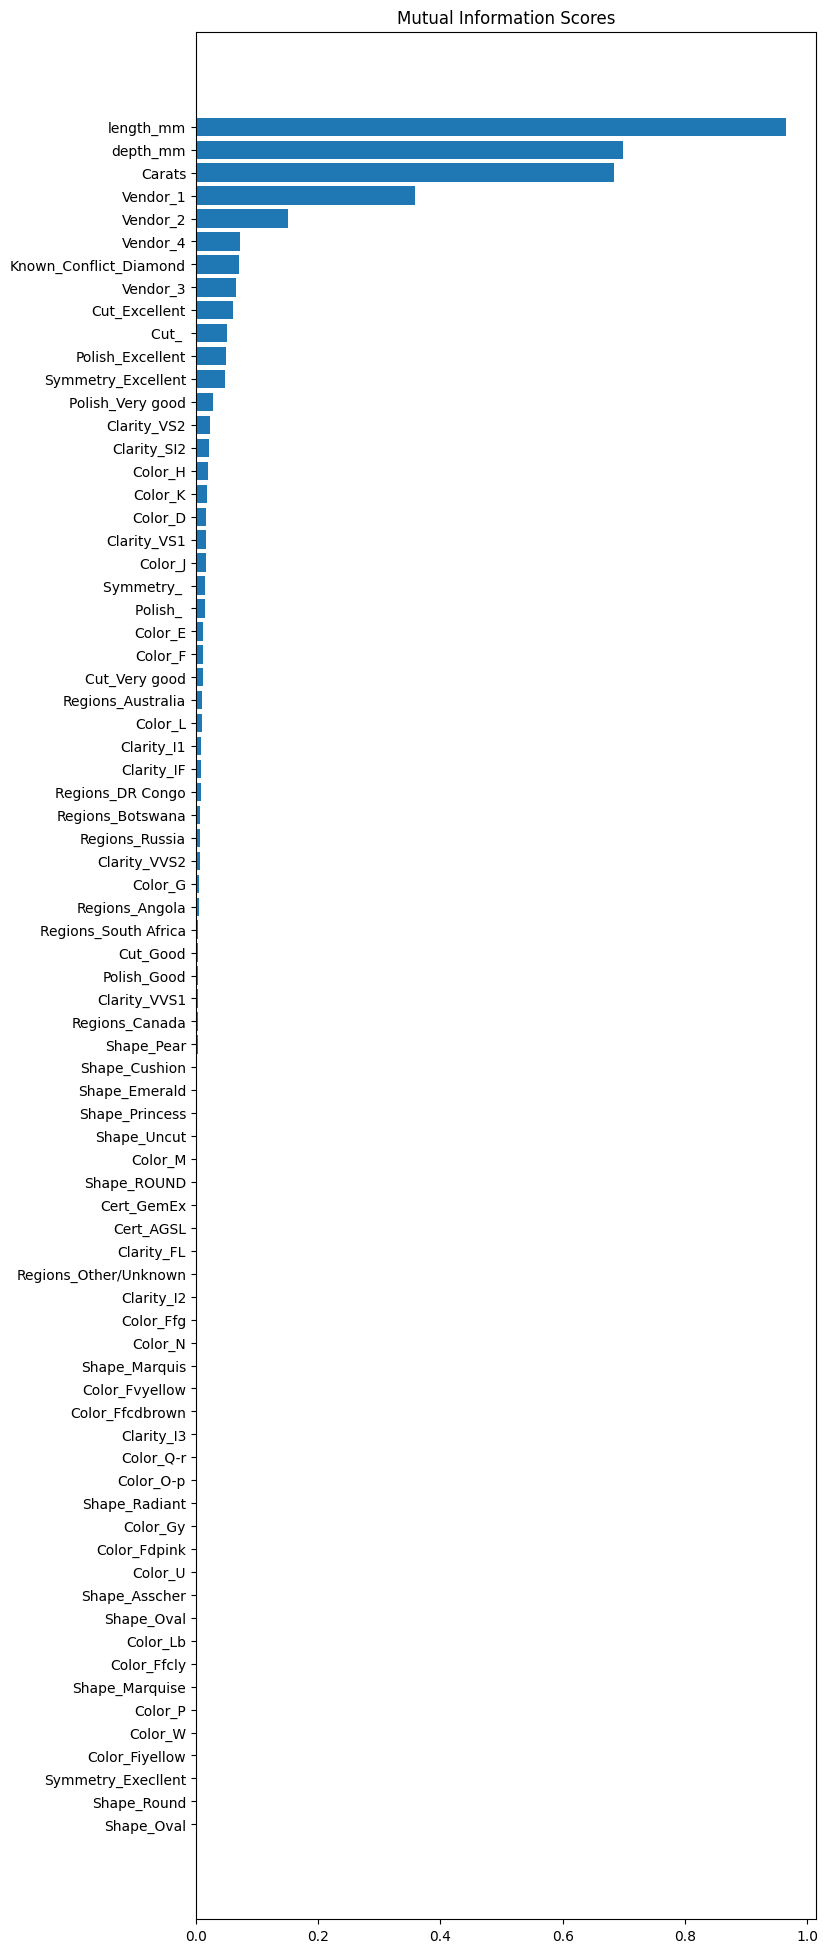

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 25))
plot_mi_scores(mi_scores)

## Prediction with 20 features

In [ ]:
#20 features for logRetail Prediction
X20 = df[MI_col_r]
y20 = df["LogRetail"]

X_train20, X_test20, y_train20, y_test20 = train_test_split(X21, y21, test_size=0.2, random_state=0)


regressor20 = LinearRegression()  
regressor20.fit(X_train20, y_train20) #training the algorithm


y_pred20 = regressor21.predict(X_test20)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test20, y_pred20))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test20, y_pred20))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test20, y_pred20)))

Mean Absolute Error: 0.17742297328479523
Mean Squared Error: 0.0667004965683207
Root Mean Squared Error: 0.25826439276121804


## Recursive Feature Elimination - feature selection (20 features with high MI scores)

Recursive Feature elimination: Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

In [ ]:
#splitting the data
X2_r = df.copy()
X2_r = X2_r[MI_col_r]
y2_r = df["LogPrice"]


In [ ]:
type(y2)

pandas.core.series.Series

In [ ]:
X2_r.dtypes

length_mm                 float64
depth_mm                  float64
Carats                    float64
Vendor_1                    uint8
Vendor_2                    uint8
Vendor_4                    uint8
Known_Conflict_Diamond      int64
Vendor_3                    uint8
Cut_Excellent               uint8
Cut_                        uint8
Polish_Excellent            uint8
Symmetry_Excellent          uint8
Polish_Very good            uint8
Clarity_VS2                 uint8
Clarity_SI2                 uint8
Color_H                     uint8
Color_K                     uint8
Color_D                     uint8
Clarity_VS1                 uint8
Color_J                     uint8
dtype: object

In [ ]:
y2_r = y2_r.astype('int64')

In [ ]:
for col in X2_r.columns.values:
  X2_r[col] = X2_r[col].astype('int64')


In [ ]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg,n_features_to_select=11)
rfe = rfe.fit(X2_r,y2_r)


print(rfe.ranking_)

[ 1  1  1  1  1  3  9  1  4  1  7  8  2 10  1  6  1  1  5  1]


In [ ]:
print(rfe.support_)

[ True  True  True  True  True False False  True False  True False False
 False False  True False  True  True False  True]


In [ ]:
j= list(X2_r.columns)
k = list(rfe.ranking_)

print([elem for idx,elem in enumerate(j) if k[idx]==1])

['length_mm', 'depth_mm', 'Carats', 'Vendor_1', 'Vendor_2', 'Vendor_3', 'Cut_ ', 'Clarity_SI2', 'Color_K', 'Color_D', 'Color_J']


In [ ]:
RFE_col_r = [elem for idx,elem in enumerate(j) if k[idx]==1]
RFE_col_r

['length_mm',
 'depth_mm',
 'Carats',
 'Vendor_1',
 'Vendor_2',
 'Vendor_3',
 'Cut_ ',
 'Clarity_SI2',
 'Color_K',
 'Color_D',
 'Color_J']

### Linear Relationship (11 final predictors) with the target varaible (assumption for Linear Model)

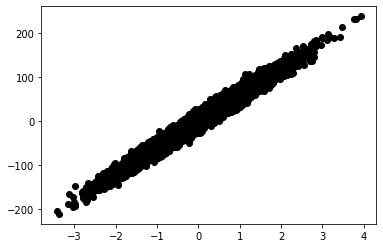

In [ ]:
y1=df['LogRetail']

from sklearn.datasets import make_regression

df['length_mm'], y1 = make_regression(n_samples=7498, n_features=1, noise=10)
plt.plot(df['length_mm'], y1, 'o', color='black');

## Linear Model for Price Prediction after RFE 11 features

In [ ]:
#11 features
X11_r = df[RFE_col_r]
y11_r = df["LogRetail"]


X_train11, X_test11, y_train11, y_test11 = train_test_split(X11_r, y11_r, test_size=0.2, random_state=0)

regressor.fit(X_train11, y_train11) #training the algorithm


y_pred11_r = regressor.predict(X_test11)


### Metrics for Best features(Linear Model with 11 features)

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test11, y_pred11_r))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test11, y_pred11_r))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test11, y_pred11_r)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test11,y_pred11_r))

Mean Absolute Error: 0.3144698170885828
Mean Squared Error: 0.2740239197743581
Root Mean Squared Error: 0.5234729408234566
Mean Absolute % Error: 3.7338028766132134


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test20, y_pred20))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test20, y_pred20))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test20, y_pred20)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test20,y_pred20))

Mean Absolute Error: 0.17742297328479523
Mean Squared Error: 0.0667004965683207
Root Mean Squared Error: 0.25826439276121804
Mean Absolute % Error: 2.0448080254571415


## With 9 MI Features

In [ ]:
MI_col9 = ['length_mm',
 'depth_mm',
 'Carats',
 'Vendor_1',
 'Vendor_2',
 'Vendor_4',
 'Known_Conflict_Diamond',
 'Vendor_3',
 'Cut_Excellent']

In [ ]:
X_MI9 = df[MI_col9]
y_MI9 = df["LogRetail"]


X_trainMI9, X_testMI9, y_trainMI9, y_testMI9 = train_test_split(X_MI9, y_MI9, test_size=0.2, random_state=0)

regressor.fit(X_trainMI9, y_trainMI9) #training the algorithm


y_predMI9 = regressor.predict(X_testMI9)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testMI9, y_predMI9))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testMI9, y_predMI9))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testMI9, y_predMI9)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_testMI9,y_predMI9))

Mean Absolute Error: 0.28383312945058514
Mean Squared Error: 0.1406798760505106
Root Mean Squared Error: 0.3750731609306518
Mean Absolute % Error: 3.1574422967929388


### We see that the best performance on test data is given by the 20 features selected as per MI score and we use this to predict the Retail price on the test data set.

## Final Price Prediction on Test data with the 20 features from this model

### Load the test data

In [ ]:
test = pd.read_csv('offers.csv')

In [ ]:
test.shape[0]

2683

In [ ]:
#use 20 features as per top MI score
#doing all the data pre processing which we had done on the training data - we need data in that format for prediction
# one of the measurements had * instead of x - this was found in python code and rectified in excel
test[['length_mm', 'width_mm', 'depth_mm']] = test['Measurements'].str.split('x', expand=True)
test.drop("Measurements", axis=1, inplace=True)
test.columns


Index(['id', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth',
       'Known_Conflict_Diamond', 'Polish', 'Regions', 'Shape', 'Symmetry',
       'Table', 'Vendor', 'Offers', 'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [ ]:
test['length_mm']=test['length_mm'].astype(float)
test['width_mm']=test['width_mm'].astype(float)
test['depth_mm']=test['depth_mm'].astype(float)

# test.drop("id", axis=1, inplace=True)

In [ ]:
test.Vendor = test.Vendor.astype(str)
# test.Known_Conflict_Diamond = test.Known_Conflict_Diamond.astype(int)

In [ ]:
test.dtypes

id                          int64
Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Depth                     float64
Known_Conflict_Diamond     object
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Table                     float64
Vendor                     object
Offers                    float64
length_mm                 float64
width_mm                  float64
depth_mm                  float64
dtype: object

In [ ]:
cat_var_test = test.loc[:,test.dtypes==np.object]
cat_var_test

,Cert,Clarity,Color,Cut,Known_Conflict_Diamond,Polish,Regions,Shape,Symmetry,Vendor
0,AGSL,SI2,L,,NaN,Excellent,Australia,Round,Excellent,1
1,GemEx,VS2,M,,NaN,Excellent,Australia,Round,Excellent,1
2,AGSL,SI2,L,,True,Excellent,DR Congo,Round,Very good,1
3,AGSL,SI1,K,,False,Very good,Angola,Emerald,Very good,1
4,AGSL,VS2,L,,False,Excellent,Russia,Round,Very good,1
...,...,...,...,...,...,...,...,...,...,...
2678,AGSL,VS1,E,Excellent,NaN,Excellent,Canada,Pear,Excellent,4
2679,AGSL,SI2,E,Excellent,True,Excellent,Angola,Round,Excellent,2
2680,AGSL,SI2,J,Excellent,NaN,Excellent,Russia,Pear,Very good,2
2681,AGSL,I1,J,Excellent,NaN,Excellent,Russia,Oval,Excellent,2


In [ ]:
#one hot encoding to change the categorical to numerical 
test = pd.get_dummies(test, columns = cat_var_test.columns.values)
test.shape

(2683, 80)

In [ ]:
# check if all the 21 columns are there in the test data set
MI_col_test_r = [i for i in MI_col_r if i in test.columns.values]

In [ ]:
test_X20 = test[MI_col_test_r]
len(test_X20.columns)

19

In [ ]:
test_X20.columns.values

array(['length_mm', 'depth_mm', 'Carats', 'Vendor_1', 'Vendor_2',
       'Vendor_4', 'Vendor_3', 'Cut_Excellent', 'Cut_ ',
       'Polish_Excellent', 'Symmetry_Excellent', 'Polish_Very good',
       'Clarity_VS2', 'Clarity_SI2', 'Color_H', 'Color_K', 'Color_D',
       'Clarity_VS1', 'Color_J'], dtype=object)

### Predictions on the test data - 20 best varaibles

In [ ]:
#out of 20 only 19 of all required important features are there in the test data
#after one hot key encoding
#define the regressor again with the train data to predict logRetail

MI_col19 = ['length_mm', 'depth_mm', 'Carats', 'Vendor_1', 'Vendor_2',
       'Vendor_4', 'Vendor_3', 'Cut_Excellent', 'Cut_ ',
       'Polish_Excellent', 'Symmetry_Excellent', 'Polish_Very good',
       'Clarity_VS2', 'Clarity_SI2', 'Color_H', 'Color_K', 'Color_D',
       'Clarity_VS1', 'Color_J']
X19 = df[MI_col19]
y19 = df["LogRetail"]

X_train19, X_test19, y_train19, y_test19 = train_test_split(X19, y19, test_size=0.2, random_state=0)

regressor19 = LinearRegression()  
regressor19.fit(X_train19, y_train19) #training the algorithm

y_pred19 = regressor19.predict(X_test19)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test19, y_pred19))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test19, y_pred19))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test19, y_pred19)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test19,y_pred19))

Mean Absolute Error: 0.30829377016548887
Mean Squared Error: 0.26836419534173234
Root Mean Squared Error: 0.5180387971394925
Mean Absolute % Error: 3.668115859062645


**The prediction with these varaibles is not so good and we will give a try for our MI9 columns**

### Predictions with 9 best varaibles as per MI score

In [ ]:
# check if all the 9 columns are there in the test data set
MI_col_test_r9 = [i for i in MI_col9 if i in test.columns.values]

test_X9 = test[MI_col_test_r9]
len(test_X9.columns)

8

In [ ]:
test_X9.columns

Index(['length_mm', 'depth_mm', 'Carats', 'Vendor_1', 'Vendor_2', 'Vendor_4',
       'Vendor_3', 'Cut_Excellent'],
      dtype='object')

In [ ]:
MI_col8 = ['length_mm', 'depth_mm', 'Carats', 'Vendor_1', 'Vendor_2', 'Vendor_4',
       'Vendor_3', 'Cut_Excellent']
X8 = df[MI_col8]
y8 = df["LogRetail"]

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=0)


regressor8 = LinearRegression()  
regressor8.fit(X_train8, y_train8) #training the algorithm

y_pred8 = regressor8.predict(X_test8)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test8, y_pred8))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test8, y_pred8))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test8, y_pred8)))
print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test8,y_pred8))

Mean Absolute Error: 0.35434940334984694
Mean Squared Error: 0.3128003860181127
Root Mean Squared Error: 0.5592856032637643
Mean Absolute % Error: 4.156907952907843


We will go with these 19 columns only for prediction - better results

### Final Retail Price Predictions

In [ ]:
#prediction on test_X20
Retail_predict = regressor19.predict(test_X20)
final_retail = np.exp(Retail_predict)
final_retail.shape[0]

2683

In [ ]:
final_retail

array([  1453.3844753 ,   1628.75930077,   1296.6347738 , ...,
        25423.70589963, 118877.65094043,   6183.28520565])

In [ ]:
pd.DataFrame({
    "Retail":final_retail
}).to_csv("Retail_Calculated.csv", index = False)

# Linear Programming to find the optimized maximum profit

In [ ]:
df1 = pd.read_csv('Retail_Calculated.csv')
df1

,Retail
0,1453.384475
1,1628.759301
2,1296.634774
3,955.579107
4,1695.832401
...,...
2678,21894.557961
2679,39554.830911
2680,25423.705900
2681,118877.650940


In [ ]:
df2 = pd.read_csv('Offer_Calculated.csv')
df2

,Offer
0,993.337079
1,1076.724258
2,934.071869
3,592.997392
4,1108.891345
...,...
2678,30395.451101
2679,37983.798540
2680,24736.046539
2681,122112.755798


In [ ]:
#test already loaded in the previous module
retail = df1['Retail']
offer = df2['Offer']
index = [i for i in range(0,2683)]

offer = offer.tolist()
retail = retail.tolist()
# index = index.tolist()

In [ ]:
sum(df2['Offer'])

3.039362739721661e+20

In [ ]:
retail_int = np.array([int(item) for item in retail])

In [ ]:
offer_int = np.array([int(item) for item in offer])

In [ ]:
len(index)

2683

In [ ]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# INITIALIZE MODEL
model = LpProblem(name="problem", sense=LpMaximize)

# VARIABLE - EACH ROW HAS UNIQUE X_i
x = LpVariable.dict('x_%s', index, lowBound=0, upBound=1, cat='Binary')
print(x)
ret = dict(zip(index, retail_int))
off = dict(zip(index, offer_int))

# OBJECTIVE
model += lpSum(retail_int - offer_int)
print(model)
# CONSTRAINT
model += lpSum([offer_int[i]  for i in index]) <= 5000000

{0: x_0, 1: x_1, 2: x_2, 3: x_3, 4: x_4, 5: x_5, 6: x_6, 7: x_7, 8: x_8, 9: x_9, 10: x_10, 11: x_11, 12: x_12, 13: x_13, 14: x_14, 15: x_15, 16: x_16, 17: x_17, 18: x_18, 19: x_19, 20: x_20, 21: x_21, 22: x_22, 23: x_23, 24: x_24, 25: x_25, 26: x_26, 27: x_27, 28: x_28, 29: x_29, 30: x_30, 31: x_31, 32: x_32, 33: x_33, 34: x_34, 35: x_35, 36: x_36, 37: x_37, 38: x_38, 39: x_39, 40: x_40, 41: x_41, 42: x_42, 43: x_43, 44: x_44, 45: x_45, 46: x_46, 47: x_47, 48: x_48, 49: x_49, 50: x_50, 51: x_51, 52: x_52, 53: x_53, 54: x_54, 55: x_55, 56: x_56, 57: x_57, 58: x_58, 59: x_59, 60: x_60, 61: x_61, 62: x_62, 63: x_63, 64: x_64, 65: x_65, 66: x_66, 67: x_67, 68: x_68, 69: x_69, 70: x_70, 71: x_71, 72: x_72, 73: x_73, 74: x_74, 75: x_75, 76: x_76, 77: x_77, 78: x_78, 79: x_79, 80: x_80, 81: x_81, 82: x_82, 83: x_83, 84: x_84, 85: x_85, 86: x_86, 87: x_87, 88: x_88, 89: x_89, 90: x_90, 91: x_91, 92: x_92, 93: x_93, 94: x_94, 95: x_95, 96: x_96, 97: x_97, 98: x_98, 99: x_99, 100: x_100, 101: x_

In [ ]:
# SOLVE MODEL
print(model)
model.solve()

problem:
MAXIMIZE
10852381605906313550864675831897281627727829
SUBJECT TO
_C1:0 <= -3.03936273972e+20

VARIABLES



-1

In [ ]:
temp = []
for var in model.variables():
   temp.append(var.value())

In [ ]:
df2['Selection'] = pd.DataFrame(temp)
#2683 values in offer

In [ ]:
sum(df2['Selection']==1.0)

# df2['Selection']

0

In [ ]:
df2[['Offer', 'Selection']]

,Offer,Selection
0,993.337079,0.0
1,1076.724258,0.0
2,934.071869,0.0
3,592.997392,0.0
4,1108.891345,0.0
...,...,...
2678,30395.451101,0.0
2679,37983.798540,0.0
2680,24736.046539,0.0
2681,122112.755798,0.0
